[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


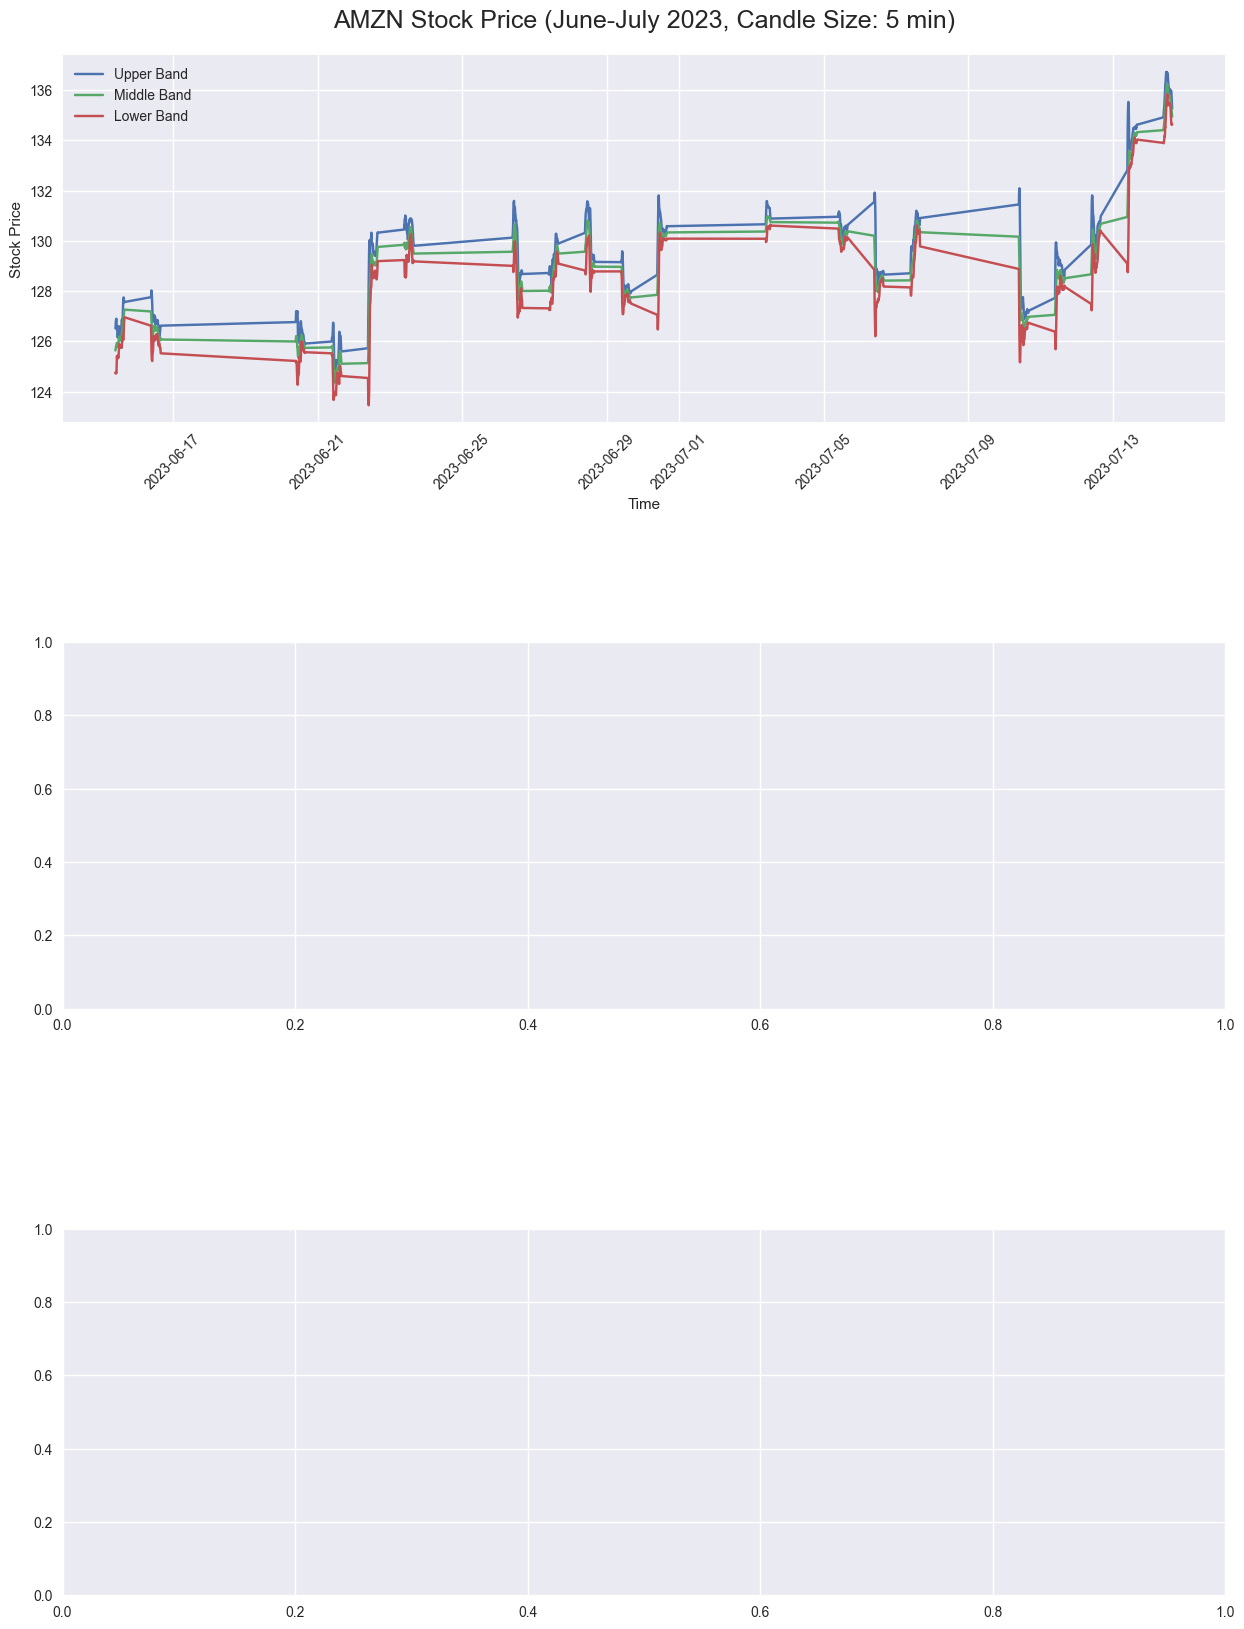

In [3]:
# --------------------------------------------------------
# Author: Daniel Xu
# Date: 07/14/2023
# Description: A program that illustrates the technical indicator of Bollinger
#   Bands using Python and Yahoo Finance
# BB Calculation:
#   - 20 Day Simple MA
#   - 20 Day Simple MA + (Standard Deviation x 2)
#   - 20 Day Simple MA - (Standard Deviation x 2)
# --------------------------------------------------------

# Import libraries
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style

def bollinger_bands(df, window):
    temp = df.copy()
    temp['Middle Band'] = temp['Adj Close'].rolling(window).mean()
    # 0 degrees of freedom, as we want to calculate SD of sample, not population
    temp['Upper Band'] = temp['Middle Band'] + (2 * temp['Adj Close'].rolling(window).std(ddof=0))
    temp['Lower Band'] = temp['Middle Band'] - (2 * temp['Adj Close'].rolling(window).std(ddof=0))
    temp['Width'] = temp['Upper Band'] - temp['Lower Band']
    
    return temp[['Middle Band', 'Upper Band', 'Lower Band', 'Width']]

# Download historical data for various stocks
tickers = ['AMZN', 'AAPL', 'GOOG']
stock_data = {}

for t in tickers:
    data = yf.download(t, period='1mo', interval='5m') # 5 minute candles
    data.dropna(how='any', inplace=True)
    stock_data[t] = data
    
for s in stock_data:
    stock_data[s][['Middle Band', 'Upper Band', 'Lower Band', 'Width']] = bollinger_bands(stock_data[s], 14)


%matplotlib inline

# Initialize the Matplotlib plot
fig = plt.figure(figsize=(15, 20))
gs = gridspec.GridSpec(3, 1, figure=fig)
style.use('seaborn-v0_8')

# Add subplots for all graphs, using gridspec to properly set spacing
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])

# AMZN Graph
ax1.set_title('AMZN Bollinger Bands Graph (June-July 2023, Candle Size: 5 min)', fontsize=18, pad=20)
ax1.set(xlabel='Time', ylabel="Stock Price")
ax1.plot(stock_data['AMZN'].index, stock_data['AMZN']['Upper Band'], label='Upper Band')
ax1.plot(stock_data['AMZN'].index, stock_data['AMZN']['Middle Band'], label='Middle Band')
ax1.plot(stock_data['AMZN'].index, stock_data['AMZN']['Lower Band'], label='Lower Band')
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

# AAPL Graph
ax2.set_title('AAPL Bollinger Bands Graph (June-July 2023, Candle Size: 5 min)', fontsize=18, pad=20)
ax2.set(xlabel='Time', ylabel="Stock Price")
ax2.plot(stock_data['AAPL'].index, stock_data['AAPL']['Upper Band'], label='Upper Band')
ax2.plot(stock_data['AAPL'].index, stock_data['AAPL']['Middle Band'], label='Middle Band')
ax2.plot(stock_data['AAPL'].index, stock_data['AAPL']['Lower Band'], label='Lower Band')
ax2.tick_params(axis='x', rotation=45)
ax2.legend()

# GOOG Graph
ax3.set_title('GOOG Bollinger Bands Graph (June-July 2023, Candle Size: 5 min)', fontsize=18, pad=20)
ax3.set(xlabel='Time', ylabel="Stock Price")
ax3.plot(stock_data['GOOG'].index, stock_data['GOOG']['Upper Band'], label='Upper Band')
ax3.plot(stock_data['GOOG'].index, stock_data['GOOG']['Middle Band'], label='Middle Band')
ax3.plot(stock_data['GOOG'].index, stock_data['GOOG']['Lower Band'], label='Lower Band')
ax3.tick_params(axis='x', rotation=45)
ax3.legend()

gs.update(hspace=0.6)

plt.show()